# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco to allow potential real estate investors to choose rental investment properties. 

In [45]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from matplotlib import cm
from panel.interact import interact


#import holoviews as hv
#hv.extension('bokeh')

%matplotlib inline

In [4]:
# Read the Mapbox API key
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

## Load Data

In [5]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path,index_col='year')
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [6]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
ave_housing_units_per_year = pd.DataFrame(sfo_data['housing_units'].groupby('year').mean())
min_housing_units = sfo_data['housing_units'].min()
max_housing_units = sfo_data['housing_units'].max()
std_housing_units = sfo_data['housing_units'].std()
ave_housing_units_per_year

housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242

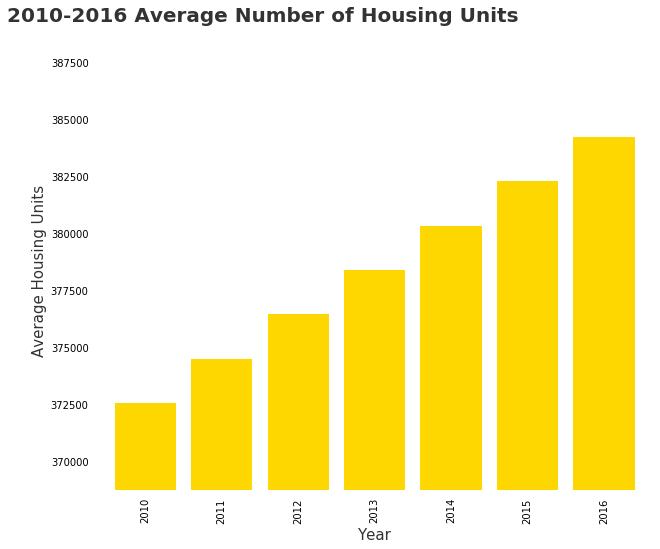

In [378]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

housing_units_fig = plt.figure()
ax = housing_units_fig.add_subplot()
transparency = 0.8

housing_units_bar = ave_housing_units_per_year.plot.bar(
    ax=ax,    
    legend=False,
    color='gold',
    figsize=(10,7),
    width=.8,
    ylim = ([min_housing_units-std_housing_units,max_housing_units+std_housing_units]))

ax.set_title("2010-2016 Average Number of Housing Units",fontsize=20,alpha=transparency,fontweight="bold")
ax.set_xlabel("Year",fontsize=15,alpha=transparency)
ax.set_ylabel("Average Housing Units",fontsize=15,alpha=transparency)
ax.set_frame_on(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.title.set_position((.3,1.05))

plt.subplots_adjust(top=1)

plt.show()
plt.close(housing_units_fig)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [379]:
# Calculate the average gross rent and average sale price per square foot
# YOUR CODE HERE!
ave_rent_sales_per_year = pd.DataFrame(sfo_data[['sale_price_sqr_foot','gross_rent']].groupby('year').mean())
ave_rent_sales_per_year

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

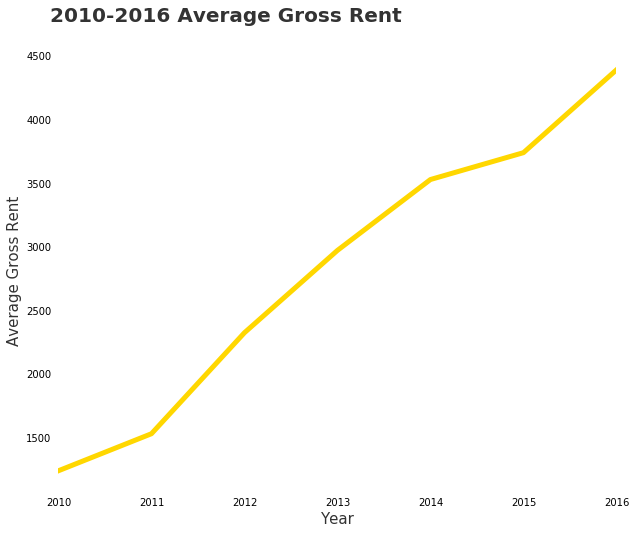

In [380]:
# Plot the Average Gross Rent per Year as a Line Chart 
# YOUR CODE HERE!

gross_rent_fig = plt.figure()
ax = gross_rent_fig.add_subplot()
transparency = 0.8

gross_rent_line = ave_rent_sales_per_year['gross_rent'].plot(
    color="gold",
    ax=ax,
    legend=False,
    figsize=(10,7),
    lw=5)

ax.set_title("2010-2016 Average Gross Rent",fontsize=20,alpha=transparency,fontweight="bold")
ax.set_xlabel("Year",fontsize=15,alpha=transparency)
ax.set_ylabel("Average Gross Rent",fontsize=15,alpha=transparency)
ax.set_frame_on(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.title.set_position((.3,1.05))

plt.subplots_adjust(top=1)

plt.show()
plt.close(gross_rent_fig)

### Average Sales Price per Year

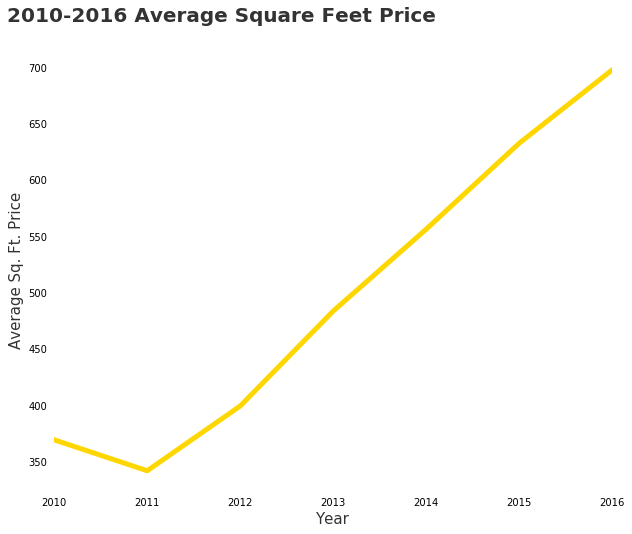

In [381]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!
sqft_price_fig = plt.figure()
ax = sqft_price_fig.add_subplot()
transparency = 0.8

sqft_price_line = ave_rent_sales_per_year['sale_price_sqr_foot'].plot(
    color="gold",
    ax=ax,
    legend=False,
    figsize=(10,7),
    lw=5)

ax.set_title("2010-2016 Average Square Feet Price",fontsize=20,alpha=transparency,fontweight="bold")
ax.set_xlabel("Year",fontsize=15,alpha=transparency)
ax.set_ylabel("Average Sq. Ft. Price",fontsize=15,alpha=transparency)
ax.set_frame_on(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.title.set_position((.3,1.05))

plt.subplots_adjust(top=1)

plt.show()
plt.close(sqft_price_fig)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [43]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!
sfo_data_by_year_and_neighborhood= pd.DataFrame(sfo_data.groupby(['year','neighborhood']).mean())
sfo_data_by_year_and_neighborhood.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [60]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
by_neighborhood_price = sfo_data_by_year_and_neighborhood['sale_price_sqr_foot'].hvplot(groupby='neighborhood')
by_neighborhood_price.opts(
    color="gold",
    hover_line_color='g',
    yticks=3,
    xticks=[2010,2011,2012,2013,2014,2015,2016],
    width=800,
    height=400,
    line_width=5,
    ylabel='Average Sq. Ft. Price',
    xlabel='Year',
    padding=0.06)

# Additional codes for overlay plots

all_neighborhood_price = sfo_data_by_year_and_neighborhood['sale_price_sqr_foot'].hvplot(by='neighborhood')
all_neighborhood_price.opts(
    yticks=3,
    xticks=[2010,2011,2012,2013,2014,2015,2016],
    width=800,
    height=400,
    ylabel='Average Sq. Ft. Price',
    xlabel='Year',
    default_tools=[],
    padding=0.06)


all_neighborhood_housing = sfo_data_by_year_and_neighborhood['housing_units'].hvplot(by="neighborhood")
all_neighborhood_housing.opts(
    yticks=3,
    xticks=[2010,2011,2012,2013,2014,2015,2016],
    width=800,
    height=400,
    ylabel='Average Sq. Ft. Price',
    xlabel='Year',
    default_tools=[],
    padding=0.06)

all_neighborhood_rent = sfo_data_by_year_and_neighborhood['gross_rent'].hvplot(by="neighborhood")
all_neighborhood_rent.opts(
    yticks=3,
    xticks=[2010,2011,2012,2013,2014,2015,2016],
    width=800,
    height=400,
    ylabel='Average Sq. Ft. Price',
    xlabel='Year',
    default_tools=[],
    padding=0.06)

by_neighborhood_price

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [105]:
# Getting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
top10_neighboorhood_by_price = pd.DataFrame(
    sfo_data.groupby('neighborhood')
    .mean()
    .sort_values('sale_price_sqr_foot',ascending=False)
    .nlargest(10,'sale_price_sqr_foot').reset_index())
top10_neighboorhood_by_price

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0  Union Square District           903.993258      377427.50  2555.166667
1         Merced Heights           788.844818      380348.00  3414.000000
2          Miraloma Park           779.810842      375967.25  2155.250000
3        Pacific Heights           689.555817      378401.00  2817.285714
4          Westwood Park           687.087575      382295.00  3959.000000
5         Telegraph Hill           676.506578      378401.00  2817.285714
6       Presidio Heights           675.350212      378401.00  2817.285714
7             Cow Hollow           665.964042      378401.00  2817.285714
8           Potrero Hill           662.013613      378401.00  2817.285714
9            South Beach           650.124479      375805.00  2099.000000

In [124]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
top10_neighborhood_bar = top10_neighboorhood_by_price.hvplot.bar(
    'neighborhood',
    'sale_price_sqr_foot',
    title='Top 10 Neighborhood by Square Foot Price',
    ylabel='Average Sq. Ft. Price',
    xlabel='Neighborhood',
    yticks=4,
    color='gold',
    line_color='w',
    hover_color='g',
    hover_cols=['housing_units','gross_rent'],
    width=800,
    height=400,
    padding=0.5,
    rot=45)
top10_neighborhood_bar

:Bars   [neighborhood]   (sale_price_sqr_foot,housing_units,gross_rent)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [125]:
# Parallel Coordinates Plot
# YOUR CODE HERE!
top10_p_coord=px.parallel_coordinates(
    top10_neighboorhood_by_price,
    labels={'sale_price_sqr_foot': 'Ave. Sq. Ft. Price',
            'housing_units': "Ave. Housing Units",
            'gross_rent': 'Ave. Gross Rent'},
    color='sale_price_sqr_foot',
    width=800,
    height=400,
    color_continuous_scale=px.colors.sequential.Cividis)

top10_p_coord

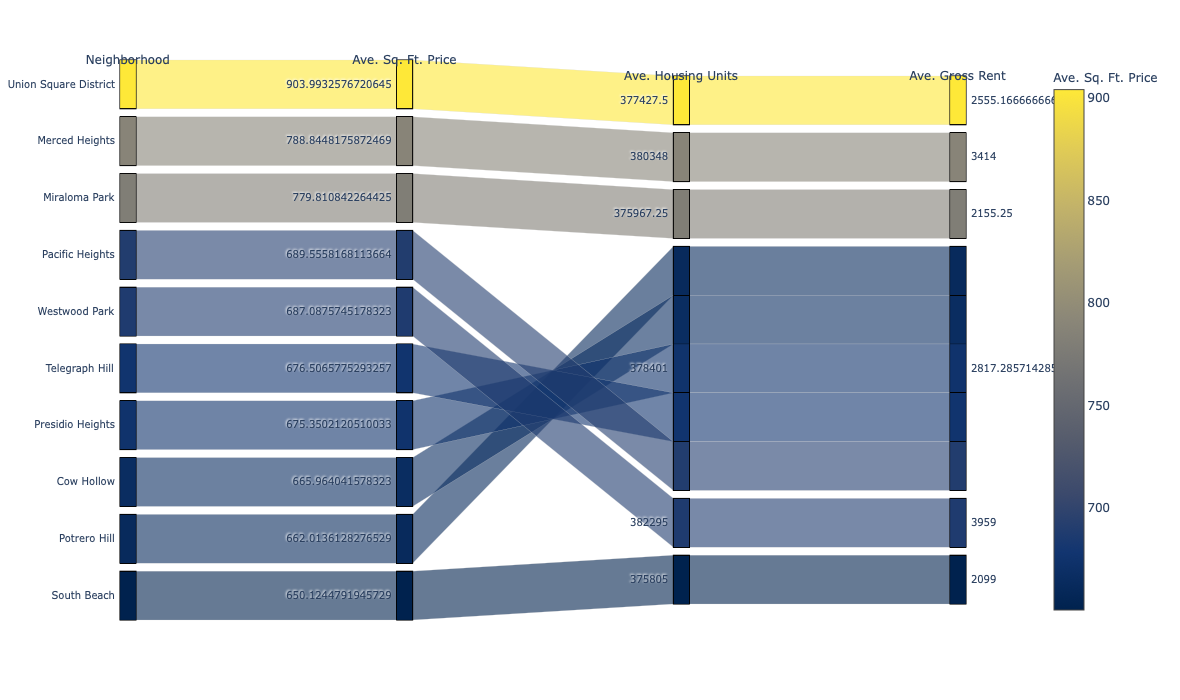

In [126]:
# Parallel Categories Plot
# YOUR CODE HERE!
top10_p_cat = px.parallel_categories(
    top10_neighboorhood_by_price,
    labels={'neighborhood':'Neighborhood',
            'sale_price_sqr_foot': 'Ave. Sq. Ft. Price',
            'housing_units': "Ave. Housing Units",
            'gross_rent': 'Ave. Gross Rent'},
    color='sale_price_sqr_foot',
    width=900,
    height=700,
    color_continuous_scale=px.colors.sequential.Cividis)

top10_p_cat

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [91]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [93]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
df_neighboorhood_averages = pd.DataFrame(
    sfo_data.groupby('neighborhood')
    .mean().reset_index())
df_neighboorhood_averages.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [94]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!
df_neighborhood = pd.concat([df_neighborhood_locations,df_neighboorhood_averages], axis='columns', join='inner').drop(columns='neighborhood')
df_neighborhood.head()

Neighborhood        Lat         Lon  sale_price_sqr_foot  housing_units  \
0     Alamo Square  37.791012 -122.402100           366.020712       378401.0   
1       Anza Vista  37.779598 -122.443451           373.382198       379050.0   
2          Bayview  37.734670 -122.401060           204.588623       376454.0   
3  Bayview Heights  37.728740 -122.410980           590.792839       382295.0   
4   Bernal Heights  37.728630 -122.443050           576.746488       379374.5   

    gross_rent  
0  2817.285714  
1  3031.833333  
2  2318.400000  
3  3739.000000  
4  3080.333333

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [102]:
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!
px.scatter_mapbox(
    df_neighborhood,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
)

In [25]:
px.scatter_mapbox(
    df_neighborhood,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
)

In [8]:
px.scatter_mapbox(
    df_neighborhood,
    lat='Lat',
    lon='Lon',
    size='sale_price_sqr_foot',
    color='gross_rent')

In [7]:
px.scatter_mapbox(df_neighborhood,lat='Lat',lon='Lon',size='sale_price_sqr_foot',color='gross_rent')

In [127]:
sfo_map = px.scatter_mapbox(
    df_neighborhood,
    title='San Francisco Neighborhoods',
    lat='Lat',
    lon='Lon',
    size='housing_units',
    color='sale_price_sqr_foot',
    text='Neighborhood',
    color_continuous_scale=px.colors.cyclical.IceFire,
    hover_name='Neighborhood',
    labels={'sale_price_sqr_foot':'Ave. Sq. Ft. Sale Price'},
    zoom=12)
sfo_map

In [340]:
hvplot(line)

AttributeError: type object 'hvPlot' has no attribute 'groupby'